# Análise exploratória de dados

## 1. Descrição dos dados

### 1.1 Configurações iniciais

In [98]:
#Importações de bibliotecas
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from IPython.display import display, HTML

from src.data import visualize, prepare

In [99]:
colors = ["#20B2AA", "#B22028"]
sns.set_theme(style="whitegrid")
sns.set_palette(sns.color_palette(colors))

### 1.2 Dicionário de dados

In [100]:
data_path = Path('../data/external/dicionario.csv')
df_dict = pd.read_csv(data_path, sep=';') #Obtendo o dataset

df_dict

,Variavel,Significado,Tipo
0,GENDER,Indica o genêro do paciente,Nominal
1,AGE,Indica a idade do paciente,Discreta
2,SMOKING,Indica se o paciente é fumante,Nominal
3,YELLOW_FINGERS,Indica se o paciente possui as extremidades do...,Nominal
4,ANXIETY,Indica se o paciente apresenta sinais de trans...,Nominal
5,PEER_PRESSURE,"Indica se o paciente, por volta da adolescenci...",Nominal
6,CHRONIC DISEASE,Indica se o paciente possui alguma comorbidade...,Nominal
7,FATIGUE,Indica se o paciente apresenta sinais de cansa...,Nominal
8,ALLERGY,Indica se o paciente possui alergia a fumaça d...,Nominal
9,WHEEZING,Indica se o paciente apresenta um chiado no pu...,Nominal


#### 1.2.1 Agrupamento de variáveis

|Grupo                |Variáveis                                                                     
|---------------------|---------------------------------------------------------------------------------
|`Sintoma`            |`SMOKING`, `YELLOW_FINGERS`, `ANXIETY`, `PEER_PRESSURE`, `CHRONIC DISEASE`, `FATIGUE`,  `ALLERGY`, `WHEEZING`, `ALCOHOL CONSUMING`, `COUGHING`, `SHORTNESS OF BREATH`, `SWALLOWING DIFFICULTY`, `CHEST PAIN`                                                    
|`Identificação`      |`AGE`, `GENDER`

**Nota:** `LUNG_CANCER` não foi incluída em nenhum grupo pois é a variável alvo.

In [101]:
df_dict = df_dict.assign(
    Grupo = df_dict.apply(prepare.group_separation, axis=1)
)
columns_by_group = {
    group: df_dict.query("Grupo == @group").Variavel.to_list()
    for group in df_dict.Grupo.unique()
}

df_dict

,Variavel,Significado,Tipo,Grupo
0,GENDER,Indica o genêro do paciente,Nominal,Identificação
1,AGE,Indica a idade do paciente,Discreta,Identificação
2,SMOKING,Indica se o paciente é fumante,Nominal,Sintoma
3,YELLOW_FINGERS,Indica se o paciente possui as extremidades do...,Nominal,Sintoma
4,ANXIETY,Indica se o paciente apresenta sinais de trans...,Nominal,Sintoma
5,PEER_PRESSURE,"Indica se o paciente, por volta da adolescenci...",Nominal,Sintoma
6,CHRONIC DISEASE,Indica se o paciente possui alguma comorbidade...,Nominal,Sintoma
7,FATIGUE,Indica se o paciente apresenta sinais de cansa...,Nominal,Sintoma
8,ALLERGY,Indica se o paciente possui alergia a fumaça d...,Nominal,Sintoma
9,WHEEZING,Indica se o paciente apresenta um chiado no pu...,Nominal,Sintoma


### 1.3 Conjunto de dados

Já conhecemos as variáveis, podemos prosseguir para a leitura dos dados

In [102]:
data_path = Path('../data/raw/data.csv')
df = (
    pd
    .read_csv(data_path)
    .rename(columns={'FATIGUE ': 'FATIGUE', 'ALLERGY ': 'ALLERGY'}) #Para manter a consistência do nome das colunas no dicionário de dados
) #Obtendo o dataset

df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

### 1.4 Dados faltantes

Primeiramente, podemos analisar se há algum valor nulo `(NaN)` nos dados.

In [104]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

Felizmente, não há nenhum valor nulo no conjunto, contudo podemos checar se outros valores foram utilizados para representar dados faltantes.

In [105]:
uniques = {'Variavel': df_dict['Variavel'], 'Valores': []}
for index, row in df_dict.iterrows():
    uniques['Valores'].append(df[row['Variavel']].unique())

df_uniques = pd.DataFrame.from_dict(uniques)
display(HTML(df_uniques.to_html())) #Para impedir que os valores de idade fiquem cortados

,Variavel,Valores
0,GENDER,"[M, F]"
1,AGE,"[69, 74, 59, 63, 75, 52, 51, 68, 53, 61, 72, 60, 58, 48, 57, 44, 64, 21, 65, 55, 62, 56, 67, 77, 70, 54, 49, 73, 47, 71, 66, 76, 78, 81, 79, 38, 39, 87, 46]"
2,SMOKING,"[1, 2]"
3,YELLOW_FINGERS,"[2, 1]"
4,ANXIETY,"[2, 1]"
5,PEER_PRESSURE,"[1, 2]"
6,CHRONIC DISEASE,"[1, 2]"
7,FATIGUE,"[2, 1]"
8,ALLERGY,"[1, 2]"
9,WHEEZING,"[2, 1]"


Com isso, podemos verificar que não há nenhum valor sendo utilizado para representar um dado faltante. Ou seja, todas as linhas do conjunto estão preenchidas corretamente.

### 1.5 Mapeamento de variáveis

Como visto no dicionário de dados, o conjunto se encontra em inglês, podemos mapear as variáveis para o português para facilitar a visualização dos dados.

In [106]:
#Traduzindo as variáveis para o português

df.replace({'YES': 'Sim', 'NO': 'Não'}, inplace=True)
df.replace({1: 'Não', 2: 'Sim'}, inplace=True)

df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,Não,Sim,Sim,Não,Não,Sim,Não,Sim,Sim,Sim,Sim,Sim,Sim,Sim
1,M,74,Sim,Não,Não,Não,Sim,Sim,Sim,Não,Não,Não,Sim,Sim,Sim,Sim
2,F,59,Não,Não,Não,Sim,Não,Sim,Não,Sim,Não,Sim,Sim,Não,Sim,Não
3,M,63,Sim,Sim,Sim,Não,Não,Não,Não,Não,Sim,Não,Não,Sim,Sim,Não
4,F,63,Não,Sim,Não,Não,Não,Não,Não,Sim,Não,Sim,Sim,Não,Não,Não


## 2. Perguntas de partida e hipóteses

Com visualizações de informações gerais poderemos responder a perguntas do tipo:

- Qual a distribuição de gênero dos pacientes?
- Qual a quantidade de casos confirmados de cancer de pulmão?
- Qual a distribuição de idade dos pacientes?
- Qual a correlação entre os sintomas dos pacientes?

## 3. Insights

### 3.1 Distribuição de variáveis

##### 3.1.1 Distribuição de gênero e idade

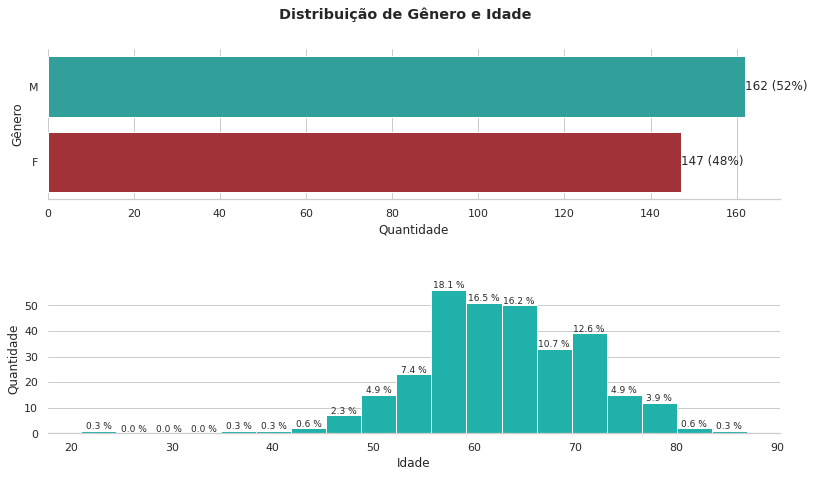

In [107]:
fig, axes = plt.subplots(2, 1, figsize=(12,7))
plt.tight_layout(pad=4, w_pad=12, h_pad=5)
fig.suptitle('Distribuição de Gênero e Idade', fontweight='bold')
visualize.variable_dist_count(df, 'GENDER', axe=axes.flatten()[0], horizontal=True)
visualize.variable_dist_histogram(df, 'AGE', axe=axes.flatten()[1])
plt.show()

#### 3.1.2 Distribuição de casos confirmados

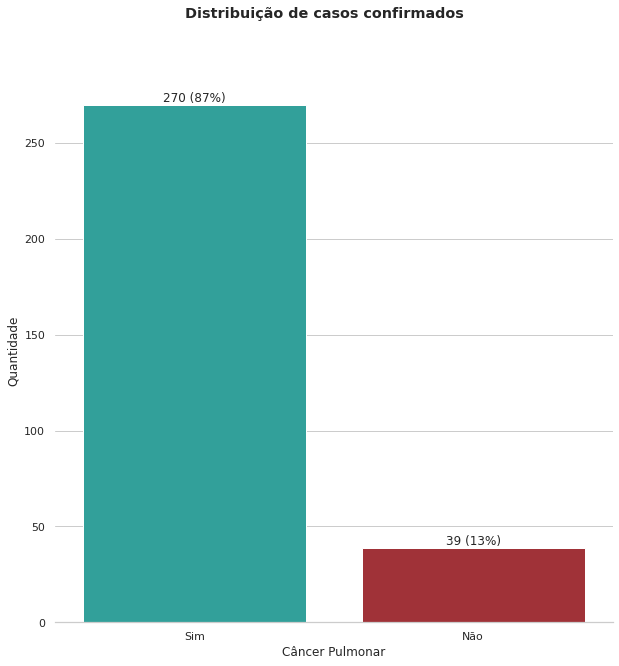

In [108]:
plt.figure(figsize=(10,10))
plt.tight_layout(pad=4, w_pad=10, h_pad=5)
plt.suptitle('Distribuição de casos confirmados', fontweight='bold')
visualize.variable_dist_count(df, 'LUNG_CANCER')
plt.show()

#### 3.1.4 Correlação de sintomas

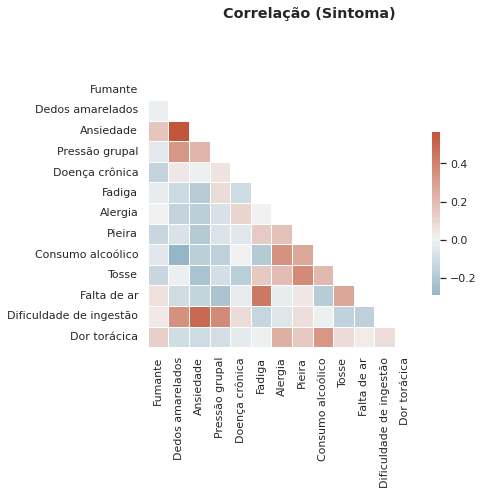

In [109]:
query_data = df.replace(["Não", "Sim"], [0, 1])
var_group = 'Sintoma'
ax = visualize.correlation(query_data[columns_by_group[var_group]], var_group, df_dict=df_dict) 
plt.show()

### 3.1.5 Sintomas mais comuns

Geral

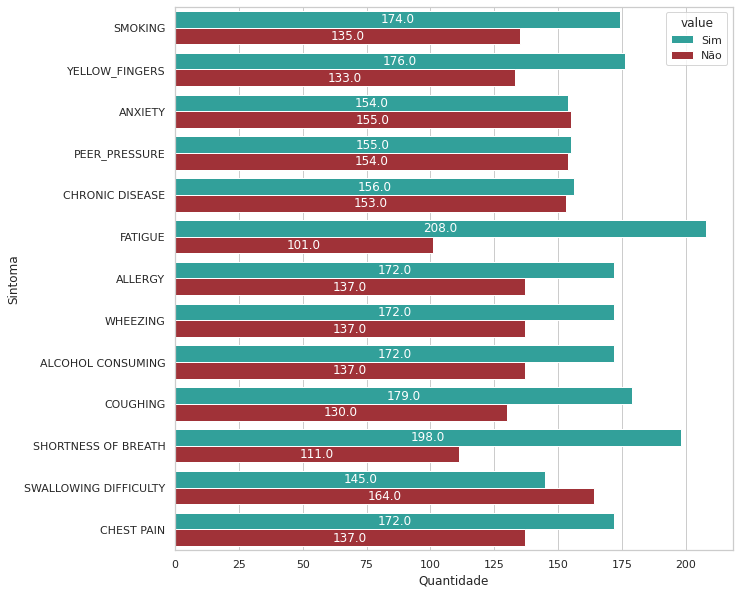

In [110]:
df1 = df.melt(value_vars=columns_by_group['Sintoma'])
plt.figure(figsize=(10,10))
ax = sns.countplot(data=df1, y='variable', hue='value', hue_order=['Sim', 'Não'])
ax.set(
    ylabel='Sintoma',
    xlabel='Quantidade',
)
ax.bar_label(
    ax.containers[0],
    fmt='%.1f',
    label_type='center',
    color='white'
)
ax.bar_label(
    ax.containers[1],
    fmt='%.1f',
    label_type='center',
    color='white'
)
plt.show()

Em casos confirmados


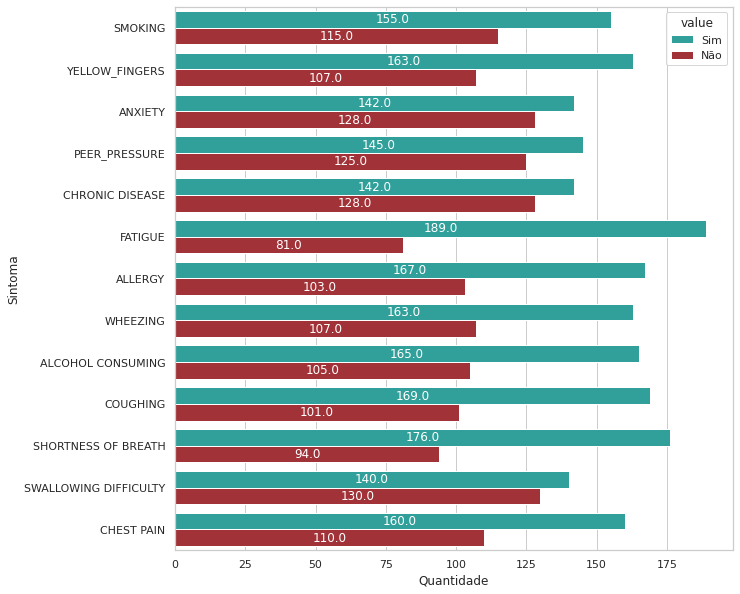

In [111]:
df2 = df.drop(df[df['LUNG_CANCER'] == 'Não'].index)
df2 = df2.melt(value_vars=columns_by_group['Sintoma'])
plt.figure(figsize=(10,10))
ax = sns.countplot(data=df2, y='variable', hue='value', hue_order=['Sim', 'Não'])
ax.set(
    ylabel='Sintoma',
    xlabel='Quantidade',
)
ax.bar_label(
    ax.containers[0],
    fmt='%.1f',
    label_type='center',
    color='white'
)
ax.bar_label(
    ax.containers[1],
    fmt='%.1f',
    label_type='center',
    color='white'
)
plt.show()

In [112]:
""" fig, axes = plt.subplots(2, 2, figsize=(18,10))
plt.tight_layout(pad=4, w_pad=10, h_pad=5)
fig.suptitle('Informações gerais', fontweight='bold')
visualize.variable_dist_count(df_view, 'Fumante', axe=axes.flatten()[0])
visualize.variable_dist_count(df_view, 'Dedos amarelados', axe=axes.flatten()[1])
visualize.variable_dist_count(df_view, 'Fadiga', axe=axes.flatten()[2])
visualize.variable_dist_count(df_view, 'Alergia', axe=axes.flatten()[3])
plt.show() """

" fig, axes = plt.subplots(2, 2, figsize=(18,10))\nplt.tight_layout(pad=4, w_pad=10, h_pad=5)\nfig.suptitle('Informações gerais', fontweight='bold')\nvisualize.variable_dist_count(df_view, 'Fumante', axe=axes.flatten()[0])\nvisualize.variable_dist_count(df_view, 'Dedos amarelados', axe=axes.flatten()[1])\nvisualize.variable_dist_count(df_view, 'Fadiga', axe=axes.flatten()[2])\nvisualize.variable_dist_count(df_view, 'Alergia', axe=axes.flatten()[3])\nplt.show() "